In [96]:
# admission data set 
# supervised learning - have both x and y value

### Problem Statement
- ### The goal here is to find the chance of admission of a candidate based on his/her GRE score, TOEFL score, rating of the university in which he/she is trying to get admission,strength of the SOP,Strength of the letter of the recommendation, CGPA and the research experience

In [97]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from joblib import dump
%matplotlib inline

In [98]:
df=pd.read_csv("Admission_Prediction.csv")  # importing the data set

In [99]:
df.drop('Serial No.', axis=1, inplace=True)


In [100]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [101]:
df_university = df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1.000000,304.156250,99.968750,1.937500,2.406250,7.786875,0.281250,0.560937
2.000000,309.548387,103.685484,2.689516,2.955645,8.186452,0.298387,0.627339
3.000000,315.032468,106.292208,3.321429,3.405844,8.504545,0.538961,0.703701
3.121649,315.133333,105.600000,3.133333,3.266667,8.346667,0.466667,0.683333
4.000000,323.213592,111.087379,3.990291,3.956311,8.940000,0.786408,0.801553
5.000000,327.236111,113.486111,4.472222,4.409722,9.280556,0.875000,0.888194


In [102]:
x=df.drop(['Chance of Admit'],axis=1)
y=df['Chance of Admit']
# here we are droping the Chance of Admit and serial no, as they are not going to be used for the features 
# Chance of Admit is the target column which shows the probalility of admission for a candidate.

In [103]:
x.head() # checking the transformed feature column

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [104]:
x = np.array(x)
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(500, 1)

In [105]:
# to be only used if you want to scale the data,standize the data,if the variation is huge in the dataset
# when we have huge variation in the data set
# i am not changing the data , i am changing the scale only like taking logs, sqrt--not changing the actual meaning of the data set
# variance betweeen the dataset become very low
# machine will understand in better way this data  as having low variance in the data set

from sklearn.preprocessing import StandardScaler
scaler_feature=StandardScaler()
scaler_lablel=StandardScaler()
scaled_data=scaler_feature.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
scaled_data

array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [106]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)
# finding mi c1 , m2 c2,..... 

In [107]:
# fitting the data to the linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [108]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

0.8076993525686699

In [109]:
# getting accuracy almost 80%

# changing the hyper parameters

In [110]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=100)
# finding mi c1 , m2 c2,..... 

In [111]:
# fitting the data to the linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [112]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

0.8149558487897137

In [113]:
import tensorflow as tf
from tensorflow import keras
#tf.keras.layers.Dense
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
#opt = keras.optimizers.Adam(learning_rate=0.01)


In [114]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mean_squared_error', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                400       
                                                                 
 activation_8 (Activation)   (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 150)               7650      
                                                                 
 activation_9 (Activation)   (None, 150)               0         
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 150)               22650     
                                                                 
 activation_10 (Activation)  (None, 150)              

In [115]:
ANN_model.compile(optimizer='adam', loss='mean_squared_error')

In [116]:
epochs_hist = ANN_model.fit(train_x, train_y, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
16/16 [==============================] - 1s 9ms/step - loss: 864.7169 - val_loss: 2.9432
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 130.2803 - val_loss: 1.8248
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 61.8394 - val_loss: 1.7636
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 38.5290 - val_loss: 1.1356
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 26.6716 - val_loss: 1.0885
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 18.1976 - val_loss: 1.6986
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 13.5961 - val_loss: 1.0864
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 11.0469 - val_loss: 1.1715
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 8.6027 - val_loss: 1.0900
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 7.8417 - val_loss: 1.0769

In [117]:
result = ANN_model.evaluate(test_x, test_y)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

4/4 [==============================] - 0s 3ms/step - loss: 1.0609
Accuracy : -0.06088292598724365


In [118]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

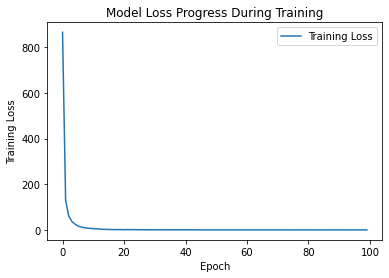

In [119]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [120]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.


from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(train_x, train_y)

DecisionTreeRegressor()

In [121]:
accuracy_decisionTree = decisionTree_model.score(test_x, test_y)
accuracy_decisionTree

0.6396309945204307

In [122]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [123]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
randomForest_model.fit(train_x, train_y)
accuracy_randomforest = randomForest_model.score(test_x, test_y)
accuracy_randomforest

C:\Users\mrhus\AppData\Local\Temp/ipykernel_7664/2085754441.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(train_x, train_y)


0.7942773123164613

UNDERSTAND VARIOUS REGRESSION KPIs

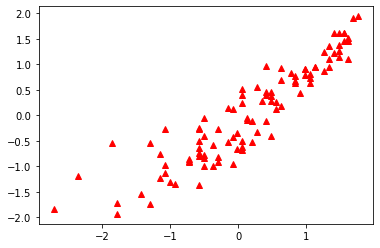

In [124]:
y_pred = reg.predict(test_x)
plt.plot(test_y, y_pred, '^', color='r')

In [125]:
y_predict_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(test_y)

In [126]:
k = test_x.shape[1]
n = len(test_x)
n

100

In [127]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.058 
MSE = 0.0033200058289450845 
MAE = 0.044688261926697725 
R2 = 0.8287147890102629 
Adjusted R2 = 0.8156822186088698


# saving the model to the local file system

- pickle library- used to convert object into bytecode - called serialization
- deserialization- converting bytecode to object

In [128]:
#filename='finalized_model.pickle'
#pickle.dump(reg,open(filename,'wb'))
dump(reg, 'filename.joblib')

['filename.joblib']

In [129]:
s = np.array([340, 120, 5, 5, 5, 9.6, 1])
print(s.shape)
s = s.reshape(1,-1)
print(s.shape)

(7,)
(1, 7)


In [130]:
#model = pickle.load(open(filename, 'rb'))
#print(model.predict(s))


In [131]:
#loaded_model=pickle.load(open(filename,'rb'))
#a=loaded_model.predict([[300,110,5,5,5,10,1]])
#a[0]

In [132]:
#a=loaded_model.predict([[320,120,5,5,5,10,1]])
#a[0]